In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# Upper confidence bound algorithm
import math
N = 10000
d = 10
ads_selected = []

numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [4]:
# upper confidence bound algorithm 
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # objective is to run first 10 ads in order
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 # update number of times ad was selected
    reward = dataset.values[n, ad] # get the correct reward from dataset
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [5]:
total_reward

2178

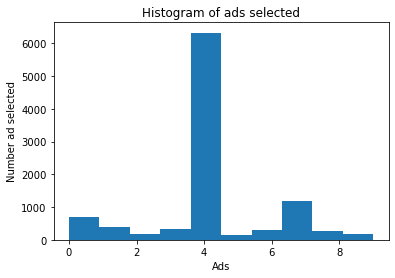

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selected')     
plt.xlabel('Ads')
plt.ylabel('Number ad selected')
plt.show()  

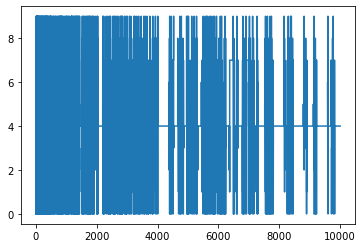

In [7]:
plt.plot(ads_selected)